In [11]:
using PyPlot
using Random

In [12]:
include("model.jl");
include("diagnostics.jl");
include("optimize.jl");
include("plotting.jl");

In [13]:
t = Array(2020:1.:2200);
β = 1.5 # damages (trillion $ / celsius^2)
utility_discount_rate = 0.014 # low value (stern review)
GWP = 100. # global world product (trillion $)
reduce_cost = 0.05*GWP
remove_cost = 0.15*GWP
geoeng_cost = 0.25*GWP
adapt_cost = 0.15*GWP
economics = Economics(
    β, utility_discount_rate,
    reduce_cost, remove_cost, geoeng_cost, adapt_cost
)

Economics(1.5, 0.014, 5.0, 15.0, 25.0, 15.0)

Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.
Converged after 201 iterations.


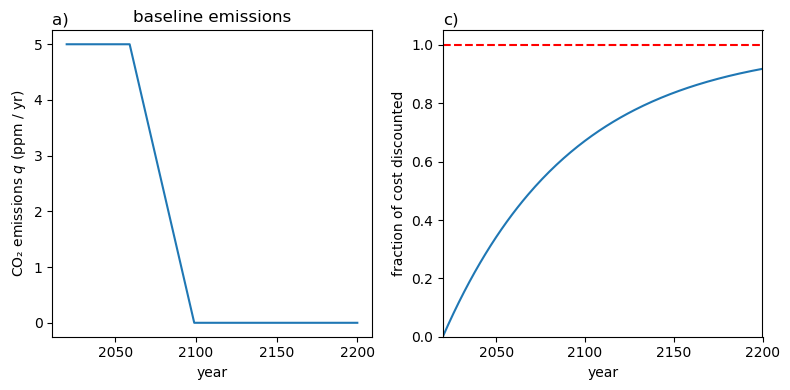

Converged after 201 iterations.


In [14]:
ensemble = Dict{String, ClimateModel}();

first = true
for (member_id, ECS) in enumerate(2.5:0.1:3.5)
    name = "member $member_id";
    controls = init_linear_controls(t);
    model = ClimateModel(name, ECS, t, controls, economics);
    optimize!(model)
    ensemble[name] = model
    
    if first; plot_setup(model); first=false; end
end

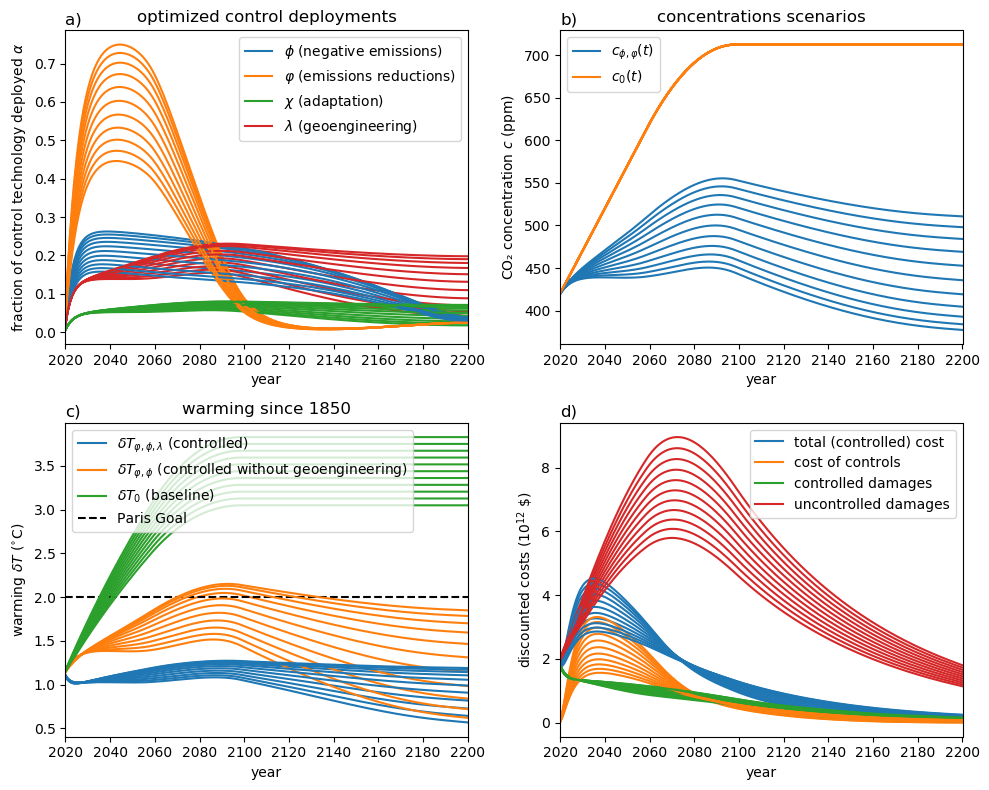

In [15]:
plot_ensemble(ensemble)